In [1]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

f_orgnl - best 12, th=0.435: 0.6993865030674846; rf (): 0.7310657596371882; best k-nn (33): 0.6229326513213981
f_op_1 - best : ; rf: ; best k-nn (): 
f_op_2 - best : ; rf: ; best k-nn (): 
f_op_3 - best : ; rf: ; best k-nn (): 

In [2]:
# Load the data
sti_features = 'train_75_people_data.csv'
#sti_features ='features_optimized_1.csv'
#sti_features ='features_optimized_2.csv'
#sti_features ='features_optimized_3.csv'

data = pd.read_csv(sti_features)

In [3]:


# Assuming 'data' and 'y' are already defined
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'black_presence', 'atypicturesal', 'blue-whiteveils', 'asymmetry_values']]
X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y=data['cancer_or_not']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


selector = RFE(LogisticRegression(), n_features_to_select=12) # Selects the top 5 features
X_selected = selector.fit_transform(X_scaled, y)
clf = LogisticRegression().fit(X_selected, y)
# Train the model




# Get probabilities of the positive class
probabilities = clf.predict_proba(X_selected)[:, 1]
acctest=False
if acctest:
    #Accuracy test
    threshold = 0.16
    step=0.01

    accuracy_dict = dict()
    recall_dict = dict()
    
    while(threshold<0.5):
        predictions = np.where(probabilities >= threshold, 1, 0)  # 1 if >= 0.6 else 0
    
        accuracy_dict[accuracy_score(y, predictions)]=threshold
        recall_dict[recall_score(y, predictions)]= threshold

        print("Accuracy:", accuracy_score(y, predictions))
        print("Recall:", recall_score(y, predictions))
        print("threshold: ",threshold)
        print()
    
        threshold+=step
    
    best_accuracy = accuracy_dict[max(accuracy_dict.keys())]
    print(recall_dict[max(recall_dict.keys())])
 
#
threshold = 0.4
predictions = np.where(probabilities >= threshold, 1, 0)  # 1 if >= 0.6 else 0


# Print new predictions with custom threshold
#print(predictions)

# Evaluate model
print("Accuracy:", accuracy_score(y, predictions))
print("Precision:", precision_score(y, predictions))
print("Recall:", recall_score(y, predictions))
print("F1 Score:", f1_score(y, predictions))
print(threshold)

seleced_features_after = []
for x in range(len(selector.support_)):
    if selector.support_[x] == True:
        seleced_features_after.append(X.columns.values[x])
        
#train model with best found parameters and save it
final_model = clf
#final_model.fit(X_train, y_train)
with open(f'log_regr_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
      
seleced_features_after

Accuracy: 0.6948228882833788
Precision: 0.6734006734006734
Recall: 0.9302325581395349
F1 Score: 0.78125
0.4


['H_value',
 'S_value',
 'V_value',
 'red_presence',
 'brown_presence',
 'blue_presence',
 'pink_presence',
 'white_presence',
 'black_presence',
 'atypical_pigment_network',
 'blue-white_veil',
 'asymmetry_values']

In [4]:
df_test_data = pd.read_csv('test_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
#X = data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./knn7_model.pkl')

pred_list = model_log.predict(X_scaled_test_data)

correct = 0
wrong = 0

for x in range(len(pred_list)):
    if pred_list[x] == y_test_data[x]:
        correct += 1
    else:
        wrong +=1

print(correct, wrong, correct/(correct+wrong))


126 74 0.63


In [5]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
conf_matrix = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y, predictions)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[110 194]
 [ 30 400]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.36      0.50       304
           1       0.67      0.93      0.78       430

    accuracy                           0.69       734
   macro avg       0.73      0.65      0.64       734
weighted avg       0.72      0.69      0.66       734



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data
#sti_features = '/Users/sunechristiansen/sune/ds_project/mdasm-2024/features.csv'
#data = pd.read_csv(sti_features)
#data = combined_df

# Separate features and target
feature_columns= ['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']
#feature_columns = ['H_value', 'V_value', 'white_presence', 'blue-white_veil', 'asymmetry_values']
X = data[feature_columns]
y = data['cancer_or_not']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Initialize the scaler
scaler = StandardScaler()
# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data with the same scaler
X_test_scaled = scaler.transform(X_test)


accuracies = list()
n=15
classifier="rf"

for i in range(n):
    # Initialize the Random Forest classifier
    rf_classifier=0
    if classifier == "rf":
        rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=5, bootstrap=True)
    elif classifier == "kn":
        rf_classifier = KNeighborsClassifier(n_neighbors=25)
    # Train the model using the scaled feature columns
    rf_classifier.fit(X_train_scaled, y_train)
    # Make predictions using the scaled test feature columns
    predictions = rf_classifier.predict(X_test_scaled)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    #print(f'Accuracy of the Random Forest classifier is: {accuracy:.2f}')
print(sum(accuracies)/len(accuracies))

0.6838612368024132


<Figure size 640x480 with 0 Axes>

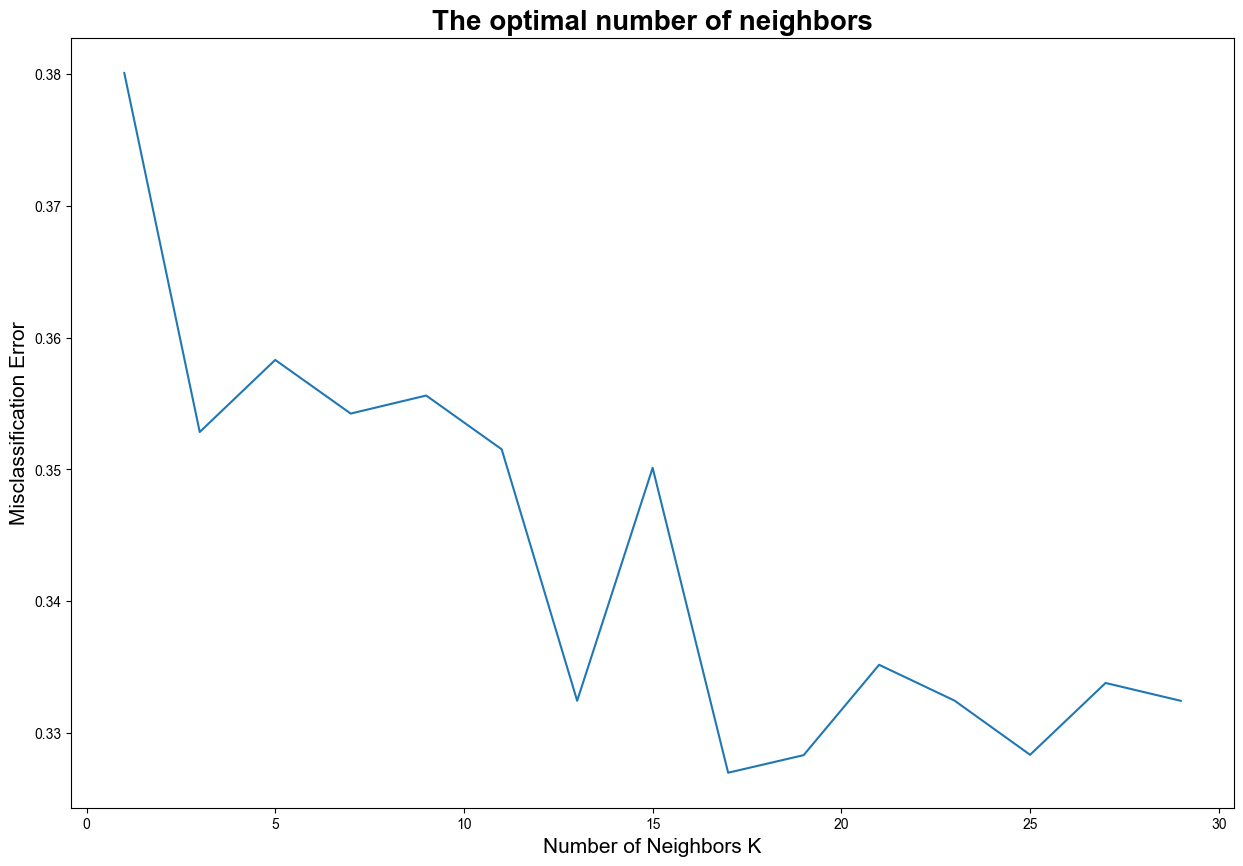

The optimal number of neighbors is 17.
0.6730220855465474
knn17_model saved successfully!


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


k_list = list(range(1,30,2)) # creating list of K for KNN
knn_cv_scores = [] # creating list of cv scores
best_knn_param=0 # best number of neighbors found after cv
best_score=0

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy') #perform cv
    knn_cv_scores.append(scores.mean())
    if knn_cv_scores[-1]>best_score: #find best score parameters
        best_score=knn_cv_scores[-1]
        best_knn_param=k

# changing to misclassification error
MSE = [1 - x for x in knn_cv_scores]

#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.savefig("knn_performance")
plt.show()

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)
print(max(knn_cv_scores))

#train model with best found parameters and save it
'''final_model = KNeighborsClassifier(n_neighbors=best_knn_param)
final_model.fit(X_scaled, y)
with open(f'knn{best_knn_param}_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)'''

print(f"knn{best_knn_param}_model saved successfully!")

In [8]:
final_model = KNeighborsClassifier(n_neighbors=best_knn_param)
final_model.fit(X_scaled, y)
with open(f'knn{best_knn_param}_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

<Figure size 640x480 with 0 Axes>

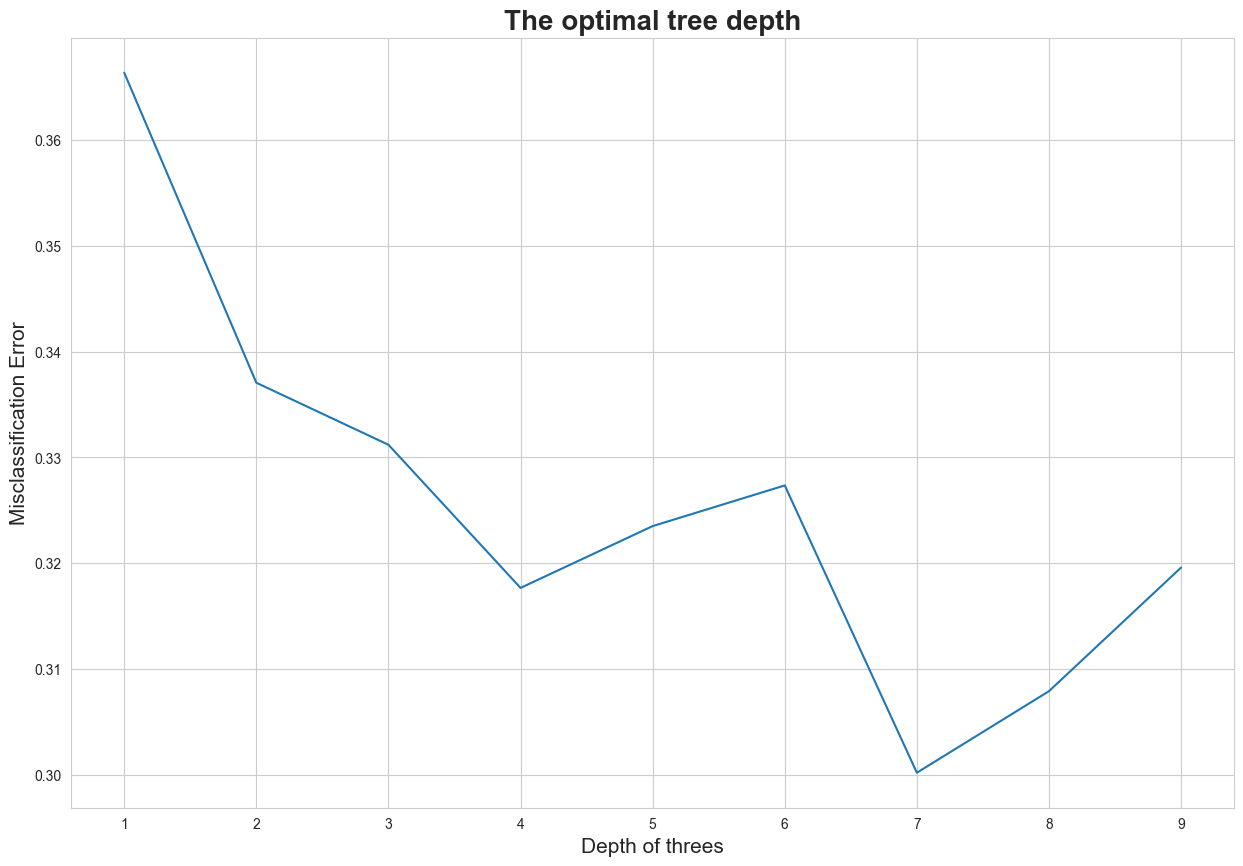

The optimal depth is 7.
0.6998286693318103
depth7_tree saved successfully!


In [9]:
rf_cv_scores = [] # creating list of cv scores
rf_list=list(range(1,10)) # creating list of depths for rf
best_rf_depth=0  # best depth found after cv
best_score=0
for d in rf_list:
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=d, bootstrap=True)
    scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy') #perform cv
    rf_cv_scores.append(scores.mean())
    if rf_cv_scores[-1]>best_score: #find best score parameters
        best_score=rf_cv_scores[-1]
        best_rf_depth=d

# changing to misclassification error
MSE = [1 - x for x in rf_cv_scores]

#ploting results of cv
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal tree depth', fontsize=20, fontweight='bold')
plt.xlabel('Depth of threes', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(rf_list, MSE)

plt.show()

best_rf = rf_list[MSE.index(min(MSE))]
print("The optimal depth is %d." % best_rf)
print(max(rf_cv_scores))


#train model with best found parameters and save it
final_tree=RandomForestClassifier(n_estimators=4500, max_depth=8, bootstrap=True)
final_tree.fit(X_train, y_train)

with open(f'depth{best_rf_depth}_tree.pkl', 'wb') as f:
    pickle.dump(final_tree, f)

print(f"depth{best_rf_depth}_tree saved successfully!")

In [10]:
#train model with best found parameters and save it
final_tree=RandomForestClassifier(n_estimators=4500, max_depth=7, bootstrap=True)
final_tree.fit(X_scaled, y)

with open(f'depth{7}_tree.pkl', 'wb') as f:
    pickle.dump(final_tree, f)

print(f"depth{7}_tree saved successfully!")

depth7_tree saved successfully!


In [11]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn17_model.pkl')


pred_list_model_log = model_log.predict(X_scaled_test_data)
pred_list_model_random_tree = model_random_tree.predict(X_scaled_test_data)
pred_list_model_knn = model_knn.predict(X_scaled_test_data)

correct = 0
wrong = 0
cancer = 0
not_cancer = 0

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0

for x in range(len(pred_list_model_log)):
    if np.sum(pred_list_model_log[x]+pred_list_model_random_tree[x]+pred_list_model_knn[x]) > 1.5:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])

print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)

Correct: 175     Wrong: 69     Cancer prediction: 147     Not cancer prediction: 97     Accuracy: 0.7172131147540983
Confusion Matrix:
[[ 64  36]
 [ 33 111]]


In [12]:
df_test_data = pd.read_csv('test_25_people_data.csv')

X_test_data = df_test_data[['H_value', 'S_value', 'V_value', 'red_presence', 'brown_presence', 'blue_presence', 'pink_presence', 'white_presence','black_presence','atypical_pigment_network', 'blue-white_veil', 'asymmetry_values']]
y_test_data=df_test_data['cancer_or_not'].to_list()

scaler = StandardScaler()
X_scaled_test_data = scaler.fit_transform(X_test_data)

model_log = pd.read_pickle('./log_regr_model.pkl')
model_random_tree = pd.read_pickle('./depth7_tree.pkl')
model_knn = pd.read_pickle('./knn27_model.pkl')




pred_list_model_log_proba = model_log.predict_proba(X_scaled_test_data)
pred_list_model_random_tree_proba = model_random_tree.predict_proba(X_scaled_test_data)
pred_list_model_knn_proba = model_knn.predict_proba(X_scaled_test_data)

pred_list_model_log_proba_norm = pred_list_model_log_proba/3
pred_list_model_random_tree_proba_norm = pred_list_model_random_tree_proba/3
pred_list_model_knn_proba_norm = pred_list_model_knn_proba/3


correct = 0
wrong = 0
cancer = 0
not_cancer = 0

threshold_proba = 0.5

#Confusion matrix
TP = 0
FP = 0
TN = 0
FN = 0




for x in range(len(pred_list_model_log)):
    no = np.sum(pred_list_model_knn_proba_norm[x][0] + pred_list_model_log_proba_norm[x][0] +  pred_list_model_random_tree_proba_norm[x][0])
    yes = np.sum(pred_list_model_knn_proba_norm[x][1] + pred_list_model_log_proba_norm[x][1] +  pred_list_model_random_tree_proba_norm[x][1])
    if yes > threshold_proba:
        cancer += 1
        if 1 == y_test_data[x]:
            TP += 1
            correct += 1
        else:
            FP += 1
            wrong +=1
    else:
        not_cancer += 1
        if 0 == y_test_data[x]:
            TN += 1
            correct += 1
        else:
            FN += 1
            wrong +=1

confusion_matrix = np.matrix([[TN, FP], [FN, TP]])
print('Correct:', correct, '    Wrong:', wrong, '    Cancer prediction:', cancer, '    Not cancer prediction:', not_cancer, '    Accuracy:', correct/(correct+wrong))
print("Confusion Matrix:")
print(confusion_matrix)


Correct: 182     Wrong: 62     Cancer prediction: 156     Not cancer prediction: 88     Accuracy: 0.7459016393442623
Confusion Matrix:
[[ 63  37]
 [ 25 119]]
